In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, qr
import seaborn as sns

class SpectralInitializer:
    def __init__(self, seed=42):
        np.random.seed(seed)
    
    def power_law_spectrum(self, size, alpha=0.5):
        """Generate power law eigenvalue spectrum λ_i = i^(-α)"""
        return np.power(np.arange(1, size + 1), -alpha)
    
    def musical_interval_spectrum(self, size, base=1.0):
        """Generate eigenvalues based on chromatic scale"""
        return base * np.power(2.0, np.arange(size) / 12.0)
    
    def harmonic_spectrum(self, size, base=1.0):
        """Generate harmonic series eigenvalues"""
        return base / np.arange(1, size + 1)
    
    def clustered_spectrum(self, size, cluster_values, cluster_sizes):
        """Generate clustered eigenvalue spectrum"""
        eigenvals = []
        
        for val, cluster_size in zip(cluster_values, cluster_sizes):
            if len(eigenvals) >= size:
                break
            
            # Add cluster with small random variation
            cluster_size = min(cluster_size, size - len(eigenvals))
            cluster_noise = np.random.normal(0, 0.1 * val, cluster_size)
            cluster_vals = np.maximum(0.01, val + cluster_noise)
            eigenvals.extend(cluster_vals)
        
        # Fill remaining with small values
        while len(eigenvals) < size:
            eigenvals.append(0.1)
        
        return np.array(eigenvals[:size])
    
    def spectral_init(self, rows, cols, eigenvals):
        """
        Create weight matrix with specified eigenvalue spectrum
        W = U @ S @ V.T where S has desired eigenvalues
        """
        min_dim = min(rows, cols)
        
        # Generate random orthogonal matrices
        U, _ = qr(np.random.randn(rows, rows))
        V, _ = qr(np.random.randn(cols, cols))
        
        # Create diagonal matrix with eigenvalues
        S = np.zeros((rows, cols))
        for i in range(min_dim):
            if i < len(eigenvals):
                S[i, i] = eigenvals[i]
            else:
                S[i, i] = 0.1  # Default small value
        
        # Reconstruct matrix
        return U @ S @ V.T
    
    def sound_network_init(self, rows, cols, param_type="mixed"):
        """
        Specialized initialization for different sound parameter types
        """
        min_dim = min(rows, cols)
        
        if param_type == "frequency":
            # Logarithmic scaling for frequency parameters
            eigenvals = self.musical_interval_spectrum(min_dim, 1.0)
        elif param_type == "amplitude":
            # Heavy-tailed for amplitude parameters
            eigenvals = self.power_law_spectrum(min_dim, 0.3)
        elif param_type == "modulation":
            # Clustered for modulation parameters
            cluster_vals = [2.0, 1.0, 0.5]  # Fast, medium, slow modulation
            cluster_sizes = [3, 4, 3]
            eigenvals = self.clustered_spectrum(min_dim, cluster_vals, cluster_sizes)
        elif param_type == "mixed":
            # Harmonic series for mixed parameters
            eigenvals = self.harmonic_spectrum(min_dim, 1.5)
        else:
            # Default power law
            eigenvals = self.power_law_spectrum(min_dim, 0.5)
        
        return self.spectral_init(rows, cols, eigenvals)
    
    def analyze_spectrum(self, matrix):
        """Analyze the eigenvalue spectrum of the resulting matrix"""
        # For non-square matrices, analyze A.T @ A
        if matrix.shape[0] != matrix.shape[1]:
            analysis_matrix = matrix.T @ matrix
        else:
            analysis_matrix = matrix
        
        eigenvals = np.linalg.eigvals(analysis_matrix)
        eigenvals = np.sort(eigenvals)[::-1]  # Sort descending
        
        return eigenvals.real  # Take real part
    
    def visualize_spectrum(self, eigenvals, title="Eigenvalue Spectrum"):
        """Visualize eigenvalue spectrum"""
        plt.figure(figsize=(10, 6))
        
        # Plot eigenvalues
        plt.subplot(1, 2, 1)
        plt.plot(eigenvals, 'bo-', markersize=4)
        plt.xlabel('Index')
        plt.ylabel('Eigenvalue')
        plt.title(f'{title} - Linear Scale')
        plt.grid(True, alpha=0.3)
        
        # Plot eigenvalues on log scale
        plt.subplot(1, 2, 2)
        plt.semilogy(eigenvals, 'ro-', markersize=4)
        plt.xlabel('Index')
        plt.ylabel('Eigenvalue (log scale)')
        plt.title(f'{title} - Log Scale')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def visualize_weight_matrix(self, matrix, title="Weight Matrix"):
        """Visualize the weight matrix structure"""
        plt.figure(figsize=(12, 8))
        
        # Heatmap of weight matrix
        plt.subplot(2, 2, 1)
        sns.heatmap(matrix, cmap='RdBu_r', center=0, cbar=True)
        plt.title(f'{title} - Full Matrix')
        
        # Singular values
        U, s, Vt = svd(matrix, full_matrices=False)
        plt.subplot(2, 2, 2)
        plt.plot(s, 'go-', markersize=4)
        plt.xlabel('Index')
        plt.ylabel('Singular Value')
        plt.title('Singular Values')
        plt.grid(True, alpha=0.3)
        
        # Left singular vectors (first few)
        plt.subplot(2, 2, 3)
        for i in range(min(3, U.shape[1])):
            plt.plot(U[:, i], label=f'U[:,{i}]')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Left Singular Vectors')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Right singular vectors (first few)
        plt.subplot(2, 2, 4)
        for i in range(min(3, Vt.shape[0])):
            plt.plot(Vt[i, :], label=f'V[{i},:]')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Right Singular Vectors')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()



1. Frequency Parameters (3D joystick → 10D frequency space)
Weight matrix shape: (10, 3)
Weight matrix:
[[ 0.03128572  0.37955393 -0.14144013]
 [-0.33198293  0.02714217  0.06690939]
 [ 0.41325918  0.24373683 -0.54920256]
 [ 0.36356555 -0.02116345  0.65915428]
 [ 0.31651294  0.06274604 -0.22100059]
 [ 0.08906555 -0.29145353 -0.27006797]
 [-0.05788522 -0.61002125  0.01192807]
 [ 0.5942703   0.10023291  0.25111786]
 [-0.17790574  0.68994575  0.30429739]
 [ 0.42834249 -0.28221433  0.13760174]]

Eigenvalues: [1.25992105 1.12246205 1.        ]...


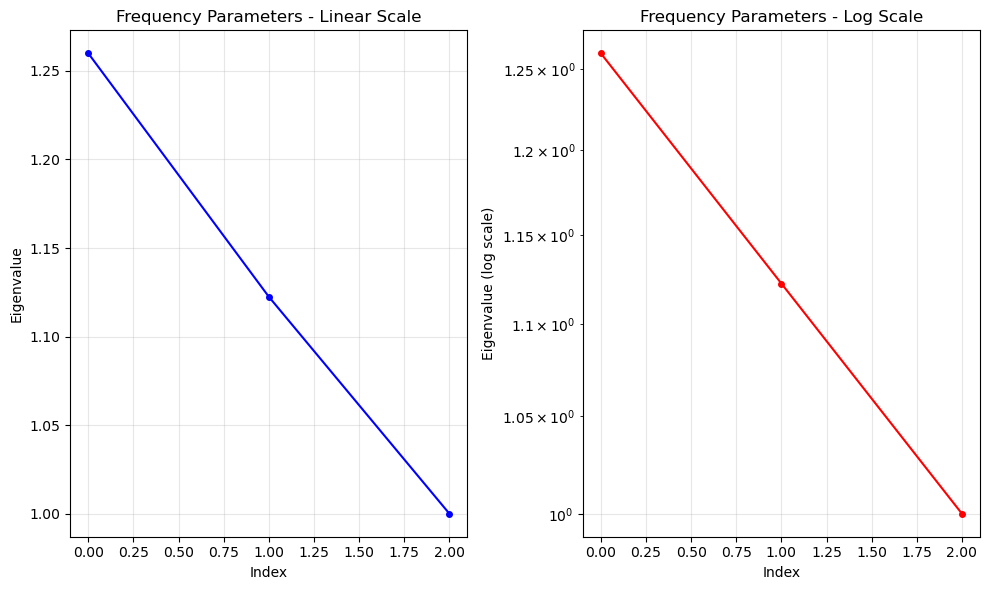

In [7]:
initializer = SpectralInitializer(seed=42)

# Example 1: Joystick (3D) to frequency parameters (10D)
print("1. Frequency Parameters (3D joystick → 10D frequency space)")
freq_weights = initializer.sound_network_init(10, 3, "frequency")
print(f"Weight matrix shape: {freq_weights.shape}")
print(f"Weight matrix:\n{freq_weights}")
print()
# Analyze eigenvalue spectrum
freq_eigenvals = initializer.analyze_spectrum(freq_weights)
print(f"Eigenvalues: {freq_eigenvals[:5]}...")  # Show first 5
initializer.visualize_spectrum(freq_eigenvals, "Frequency Parameters")


2. Amplitude Parameters (16D hidden → 8D amplitude space)
Weight matrix shape: (8, 16)
Eigenvalues: [1.         0.65975396 0.51728186 0.43527528 0.38073079]...


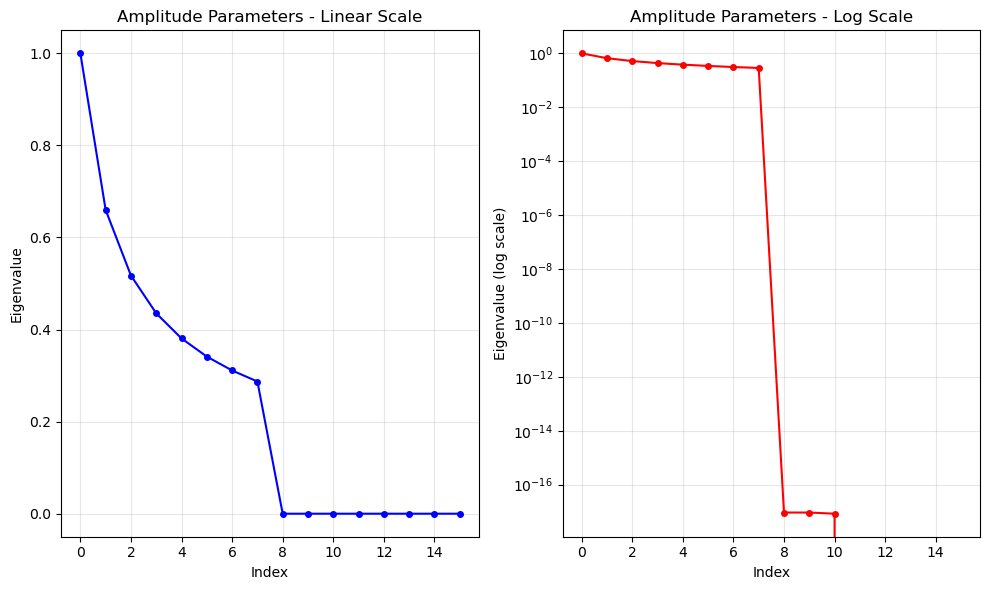

In [8]:
# Example 2: Hidden layer (16D) to amplitude parameters (8D)
print("2. Amplitude Parameters (16D hidden → 8D amplitude space)")
amp_weights = initializer.sound_network_init(8, 16, "amplitude")
print(f"Weight matrix shape: {amp_weights.shape}")

amp_eigenvals = initializer.analyze_spectrum(amp_weights)
print(f"Eigenvalues: {amp_eigenvals[:5]}...")
initializer.visualize_spectrum(amp_eigenvals, "Amplitude Parameters")


3. Modulation Parameters (32D hidden → 12D modulation space)
Weight matrix shape: (12, 32)
Eigenvalues: [3.10939722 2.71673499 2.53495297 1.32304218 1.14865712 1.01487386
 0.94684443 0.33806175]...


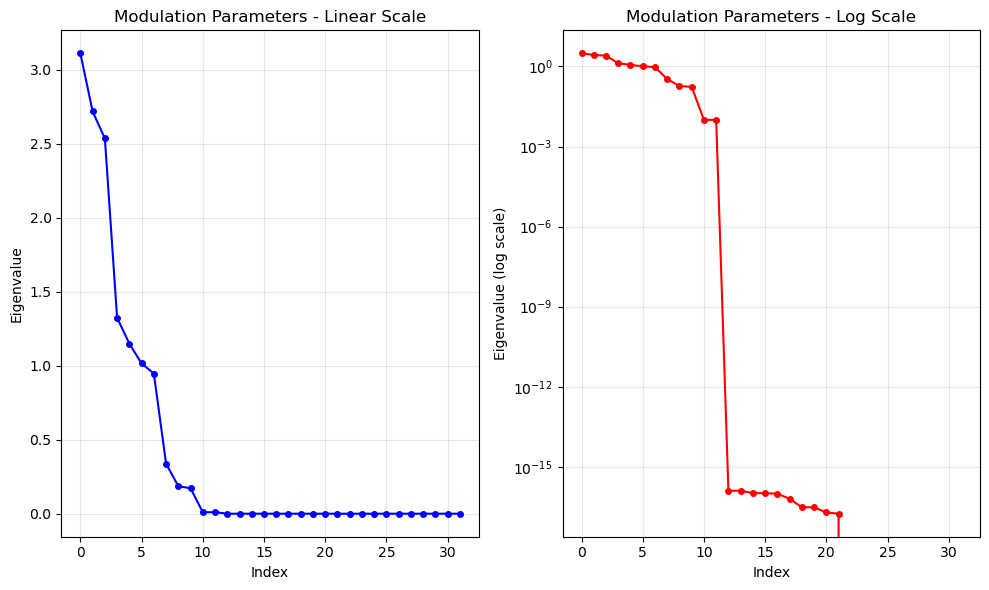

In [9]:
# Example 3: Modulation parameters with clustered spectrum
print("3. Modulation Parameters (32D hidden → 12D modulation space)")
mod_weights = initializer.sound_network_init(12, 32, "modulation")
print(f"Weight matrix shape: {mod_weights.shape}")

mod_eigenvals = initializer.analyze_spectrum(mod_weights)
print(f"Eigenvalues: {mod_eigenvals[:8]}...")
initializer.visualize_spectrum(mod_eigenvals, "Modulation Parameters")


4. Custom Eigenvalue Spectrum
Desired eigenvalues: [3.  2.  1.5 1.  0.5 0.3 0.1]
Actual eigenvalues: [ 0.7611092   0.7611092   0.38849997  0.38849997 -0.02130473 -0.02130473
 -0.1465381  -0.1465381 ]


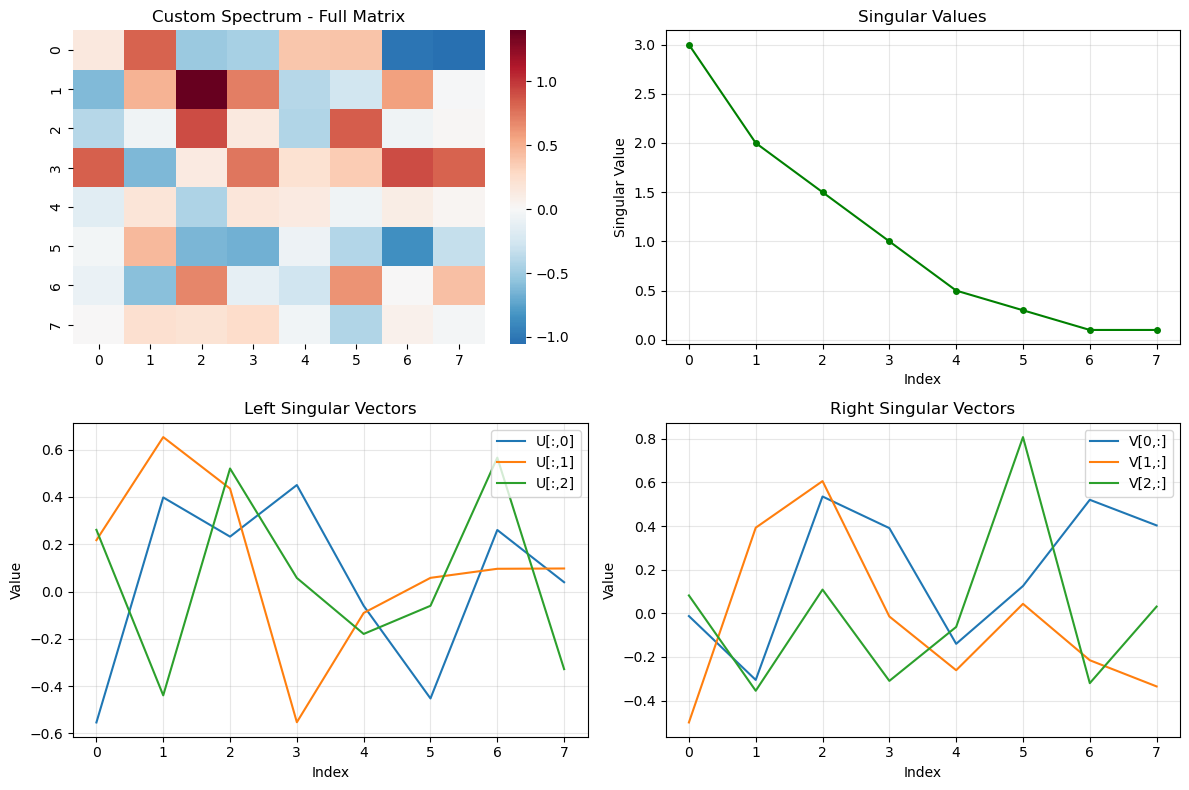

In [11]:
# Example 4: Custom eigenvalue spectrum
print("4. Custom Eigenvalue Spectrum")
custom_eigenvals = np.array([3.0, 2.0, 1.5, 1.0, 0.5, 0.3, 0.1])
custom_weights = initializer.spectral_init(8, 8, custom_eigenvals)
print(f"Desired eigenvalues: {custom_eigenvals}")

actual_eigenvals = initializer.analyze_spectrum(custom_weights)
print(f"Actual eigenvalues: {actual_eigenvals}")

# Visualize the weight matrix structure
initializer.visualize_weight_matrix(custom_weights, "Custom Spectrum")


In [18]:
np.var(custom_weights)

0.2570147361064136

5. Comparison of Different Initialization Strategies


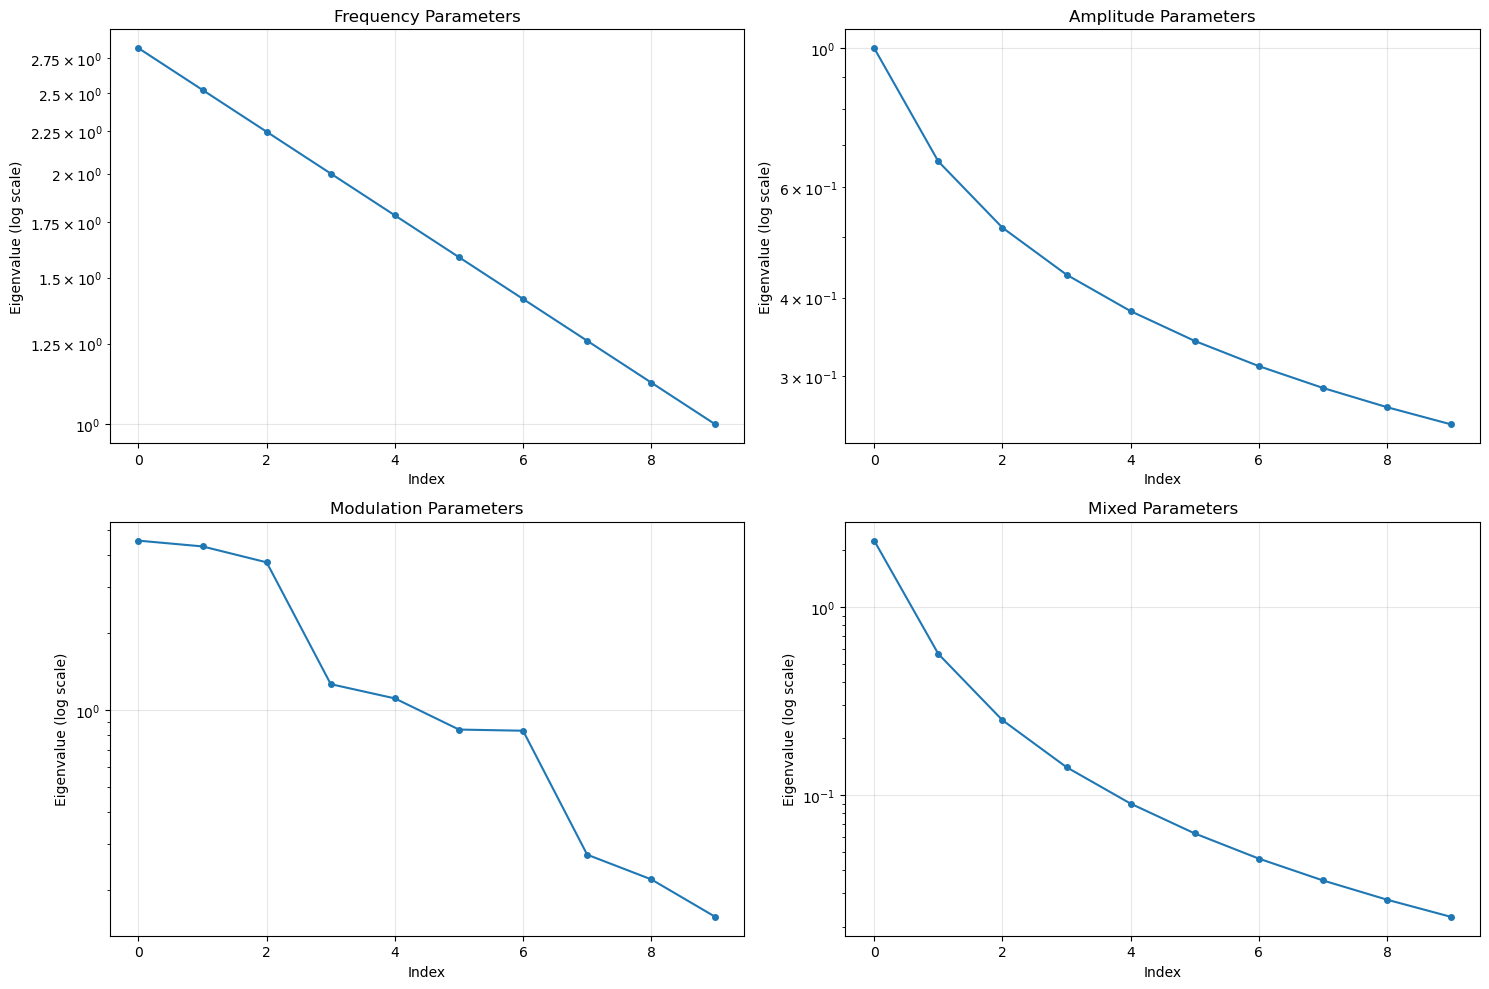

In [12]:
# Example 5: Compare different initialization strategies
print("5. Comparison of Different Initialization Strategies")

strategies = ["frequency", "amplitude", "modulation", "mixed"]
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(strategies):
    weights = initializer.sound_network_init(20, 10, strategy)
    eigenvals = initializer.analyze_spectrum(weights)
    
    plt.subplot(2, 2, i+1)
    plt.semilogy(eigenvals, 'o-', markersize=4)
    plt.xlabel('Index')
    plt.ylabel('Eigenvalue (log scale)')
    plt.title(f'{strategy.capitalize()} Parameters')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

6. Complete Network Architecture
Layer 1: 3D → 16D (mixed)
  Weight range: [-0.329, 0.865]
  Weight std: 0.250
Layer 2: 16D → 32D (frequency)
  Weight range: [-0.771, 0.830]
  Weight std: 0.292
Layer 3: 32D → 30D (amplitude)
  Weight range: [-0.319, 0.281]
  Weight std: 0.090


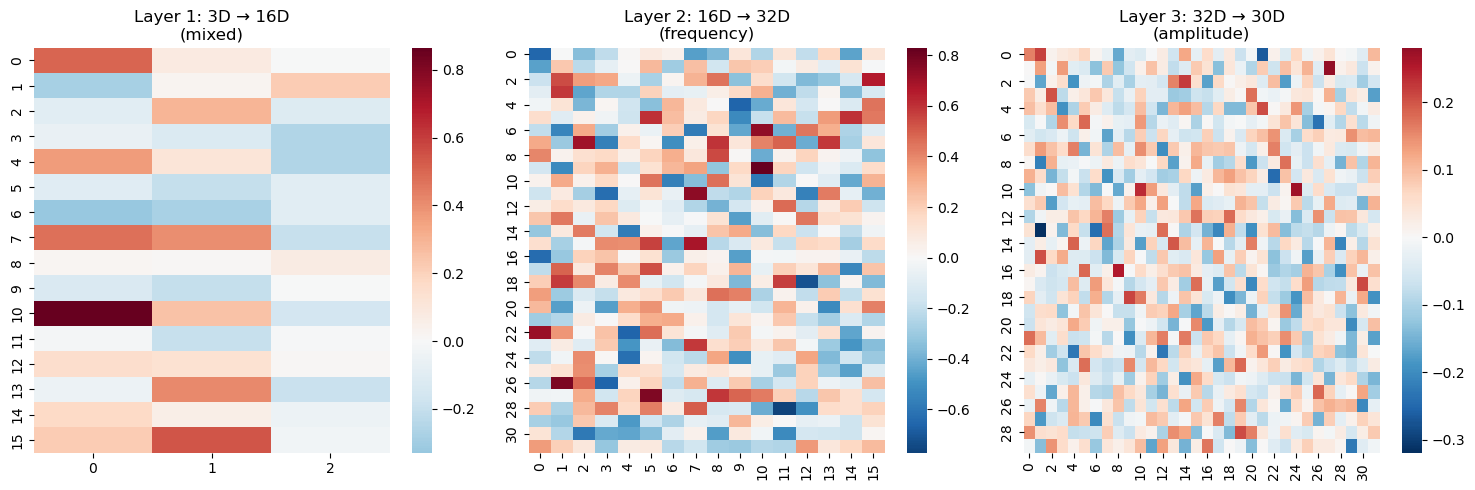

In [13]:
  
# Example 6: Network architecture with multiple layers
print("6. Complete Network Architecture")

# Joystick (3D) → Hidden1 (16D) → Hidden2 (32D) → Sound params (30D)
layer_configs = [
    (16, 3, "mixed"),      # Input to first hidden
    (32, 16, "frequency"), # Hidden1 to Hidden2
    (30, 32, "amplitude")  # Hidden2 to output
]

network_weights = []
for i, (rows, cols, param_type) in enumerate(layer_configs):
    weights = initializer.sound_network_init(rows, cols, param_type)
    network_weights.append(weights)
    print(f"Layer {i+1}: {cols}D → {rows}D ({param_type})")
    print(f"  Weight range: [{weights.min():.3f}, {weights.max():.3f}]")
    print(f"  Weight std: {weights.std():.3f}")

# Visualize network architecture
plt.figure(figsize=(15, 5))
for i, (weights, (rows, cols, param_type)) in enumerate(zip(network_weights, layer_configs)):
    plt.subplot(1, 3, i+1)
    sns.heatmap(weights, cmap='RdBu_r', center=0, cbar=True)
    plt.title(f'Layer {i+1}: {cols}D → {rows}D\n({param_type})')

plt.tight_layout()
plt.show()


